# Dæmi 8 Pólhnit


In [51]:
import math
def pol2rec(r,theta):
    theta = math.radians(theta)
    x = r * math.cos(theta)
    y = r * math.sin(theta)     
    return x, y
print("x: {:.3f}, y: {:.3f}".format(*pol2rec(4, 35)))

def rec2pol(x,y):
    theta = math.atan2(y,x) 
    r = math.sqrt((x**2) + (y**2))
    return r , math.degrees(theta)
print("Radius: {:.3f}, Horn: {:.3f}°".format(*rec2pol(3.276, 2.294)))


x: 3.277, y: 2.294
Radius: 3.999, Horn: 35.001°


# Dæmi 23 Málmavinnsla
## Sætistölur eðallofttegunda  

In [52]:
k = [* range(1,8)]
def Sk(k):
    sk = ((k+1)*(k+2)*(k+3)) / (6)
    if k % 2 == 0:
        p2 = (k/2) -1
    else:
        p2 = -2
    sum = sk + p2
    return sum

for i in range (len(k)): 
    print(f"Gildi k = {k[i]} er {Sk(k[i]):.0f}")

Gildi k = 1 er 2
Gildi k = 2 er 10
Gildi k = 3 er 18
Gildi k = 4 er 36
Gildi k = 5 er 54
Gildi k = 6 er 86
Gildi k = 7 er 118


## Lotur og flokkar

In [53]:
def lota(s):
    k = 1
    while True:
        sk = Sk(k)
        if s <= sk:
            return k
        k += 1

def flokkur(s):
    if s == 1:
        return 1
    k = lota(s)
    if 1 < s <= Sk(k-1) + 2:
        return s - Sk(k-1)
    else:
        return max(3,18 + s - Sk(k))

prufa = [20, 34, 57, 71]  
for saetistala in prufa:
    print(f"Sætistala {saetistala} er í {lota(saetistala)} lotu, flokk {flokkur(saetistala):.0f}")
    

Sætistala 20 er í 4 lotu, flokk 2
Sætistala 34 er í 4 lotu, flokk 16
Sætistala 57 er í 6 lotu, flokk 3
Sætistala 71 er í 6 lotu, flokk 3


## Íslensk og ensk málmanöfn

In [57]:
from urllib.request import urlopen
f = urlopen("https://cs.hi.is/python/allir-malmar.txt")

headers = f.readline().decode('utf-8').strip().split(';')
data = {header: [] for header in headers}
for line in f:
    parts = line.decode('utf-8').strip().split(';')
    if len(parts) == len(headers):
        for header, value in zip(headers, parts):
            data[header].append(value)
f.close()
for key, values in data.items():
    print(f"{key}: {values[:4]}") #Prentar Fyrstu 4 gildi, annars mun það prenta of mikið.

def íslenska(s):
    """notað sem 'key' í sort eða sorted til að raða í íslenska stafrófsröð,
    t.d. print(sorted(['ár','bára','bali','akur'], key=íslenska))"""
    return [íslenska.k.get(c.lower(),0) for c in s]
íslenska.a = list('0123456789aábcdðeéfghiíjklmnoópqrstuúvwxyýzþæö')
íslenska.k = dict(zip(íslenska.a, range(1,len(íslenska.a)+1)))

sortad = sorted(data['Málmur'], key=íslenska)
print(f'Sorted Málmur:{sortad[:4]}')

Tákn: ['Li', 'Be', 'Na', 'Mg']
Málmur: ['litín', 'beryllín', 'natrín', 'magnesín']
Sætistala: ['3', '4', '11', '12']
Eðlisþyngd: ['0,53', '1,85', '0,97', '1,74']
Bræðslumark: ['180', '1278', '98', '639']
Enska: ['Lithium', 'Beryllium', 'Sodium', 'Magnesium']
Sorted Málmur:['aktín', 'ál', 'barín', 'beryllín']


## Eðlisþyngd eftir sæti. 

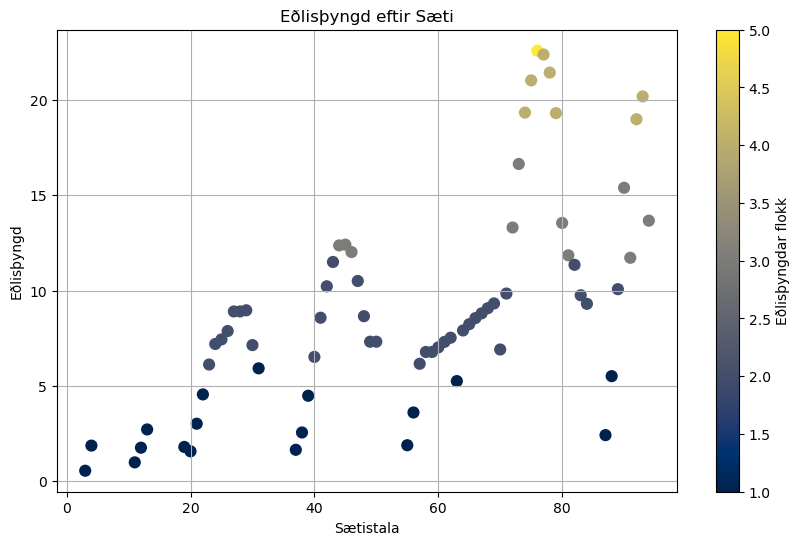

In [91]:
import matplotlib.pyplot as plt
import numpy as np

edlisthyngd = np.array([round(float(value.replace(',', '.')), 2) for value in data['Eðlisþyngd']], dtype=float)
parta = np.linspace(edlisthyngd.min(), edlisthyngd.max(), 5) 
edlisthyngd_digit= np.digitize(edlisthyngd, parta)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(saetistala, edlisthyngd, c=edlisthyngd_digit, cmap='cividis', s=60)

plt.colorbar(scatter, label='Eðlisþyngdar flokk')
plt.xlabel('Sætistala')
plt.ylabel('Eðlisþyngd')
plt.title('Eðlisþyngd eftir Sæti')
plt.grid(True)
plt.show()


## Bræðslumark

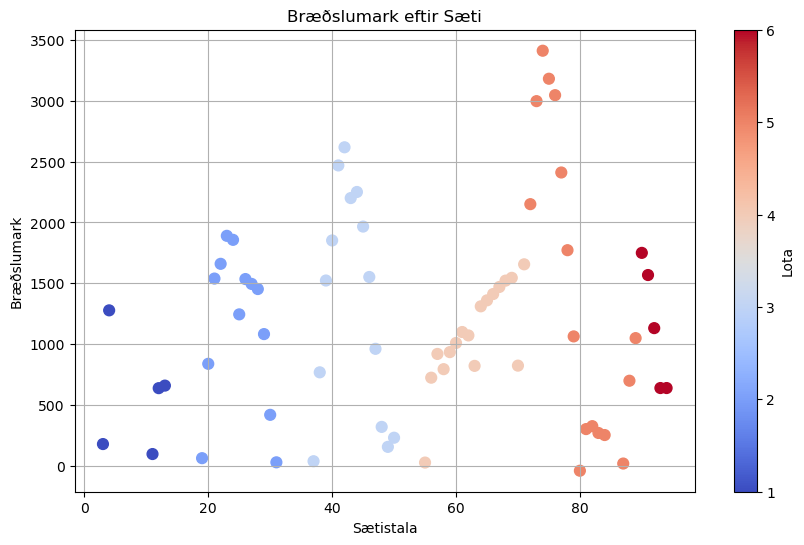

In [81]:
import matplotlib.pyplot as plt
import numpy as np

braedslumark = np.array([float(value.replace(',', '.')) for value in data['Bræðslumark']], dtype=float)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(saetistala, braedslumark, c=lota, cmap='coolwarm', s=60)  # Using 'lota' for color coding

plt.colorbar(scatter, label='Lota')
plt.xlabel('Sætistala')
plt.ylabel('Bræðslumark')
plt.title('Bræðslumark eftir Sæti')
plt.grid(True)
plt.show()
